---
# 딥러닝
<pre>단위 - 뉴런
    입력층 == 특성(Feature)의 개수
    출력층 == 출력 값의 개수
    각각의 뉴런과 가중치, 편향을 최적화 하기 위함

    Label => One-hot Encoding
    Data => to_numpy() or values
    Loss function + Activation Function

    input_shape(입력 특성의 개수, )

    회귀
        Loss = mse
        Activation = none

    분류
        이중
            Loss = sigmoid
            Activatioin = binary_crossentropy
        다중
            Loss = softmax
            Activation = categorical_crossentropy

    Last model add == 출력층
        model.add(출력 개수, activation="Activation Function")
    
    퍼셉트론

    바이어스
        시작점
    가중치
        특성의 영향력

    초기값은 랜덤
    Forward -> Loss -> Backward -> Forward -> Loss -> Backword -> ...
    Forward propagation
        입력 -> 각 입력에 대해서 가중치 추출 -> 바이어스와 가중치 -> 활성화 함수(f(x)) -> 출력값 계산
    
    Backward propagation
        가중치와 바이어스를 조정(Update)하여 출력값이 실제값에 가깝게 만듦
    
    Loss funtion
        출력값과 실제값를 비교하여 오차를 계산
    
    Optimizer
        

    Activation function

    Accuracy를 높이는 법
        Dense(뉴런 개수) 뉴런 개수를 늘린다
        model.add(Dense()) == 레이어  => 레이어의 개수를 늘린다

    경사하강법
        - 가중치와 바이어스를 조정할 때 손실함수로부터 조정값의 최저값을 찾기 위해
        - (다음 가중치) = (현재 가중치) - Learninig_rate * d
        - d = 손싫함수를 미분
</pre>

In [81]:
import pandas as pd

df = pd.read_csv("C:/Users/admin/Desktop/Homework/AI/AI_Class/Data/heart.csv")
df

X = df.drop("target", axis=1).values
Y = df['target']

X, Y

(array([[63.,  1.,  3., ...,  0.,  0.,  1.],
        [37.,  1.,  2., ...,  0.,  0.,  2.],
        [41.,  0.,  1., ...,  2.,  0.,  2.],
        ...,
        [68.,  1.,  0., ...,  1.,  2.,  3.],
        [57.,  1.,  0., ...,  1.,  1.,  3.],
        [57.,  0.,  1., ...,  1.,  1.,  2.]]),
 0      1
 1      1
 2      1
 3      1
 4      1
       ..
 298    0
 299    0
 300    0
 301    0
 302    0
 Name: target, Length: 303, dtype: int64)

In [83]:
y = pd.get_dummies(Y).values
y

array([[False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [Fal

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227, 13), (76, 13), (227, 2), (76, 2))

In [99]:
# pip install tensorflow
# pip install keras

In [123]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(20,input_shape=(13,),activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

model.compile(Adam(learning_rate=0.04),'binary_crossentropy',metrics=['accuracy'])

model.summary()

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                     │ (None, 20)                  │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 2)                   │              42 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,162 (4.54 KB)

 Trainable params: 1,162 (4.54 KB)

 Non-trainable params: 0 (0.00 B)

In [143]:
import numpy as np

model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_split=0.1)
# model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8210 - loss: 0.4438 - val_accuracy: 0.8696 - val_loss: 0.4033
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6450 - loss: 0.5974 - val_accuracy: 0.6957 - val_loss: 0.5264
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7329 - loss: 0.5185 - val_accuracy: 0.9130 - val_loss: 0.3179
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8250 - loss: 0.3969 - val_accuracy: 0.8696 - val_loss: 0.3488
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8308 - loss: 0.4102 - val_accuracy: 0.8696 - val_loss: 0.3403
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8524 - loss: 0.3680 - val_accuracy: 0.8696 - val_loss: 0.3358
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8359 - loss: 0.3897 - val_accuracy: 0.8696 - val_loss: 0.3903
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8235 - loss: 0.3954 - val_accuracy: 0.9565 - val_loss: 0.3373


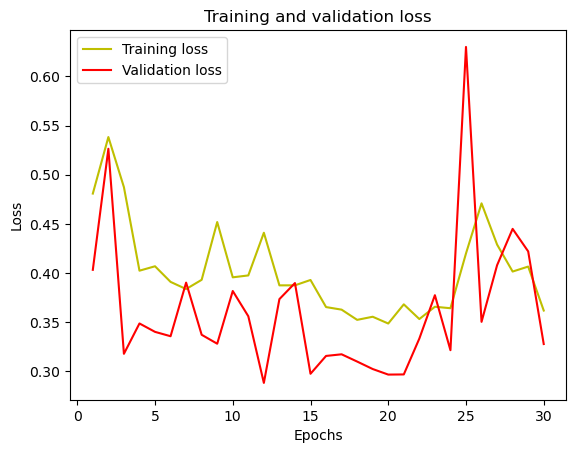

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

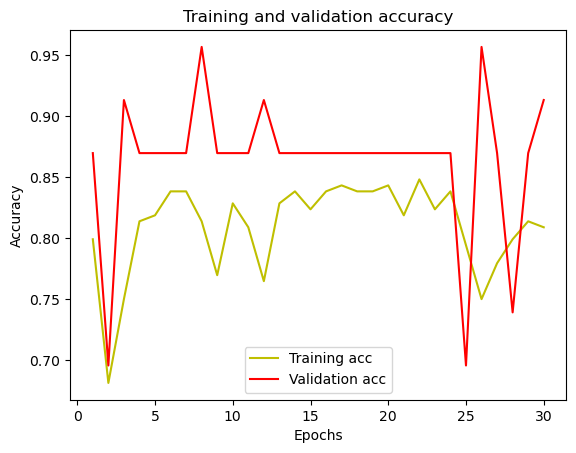

In [165]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [141]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.95      0.74      0.83        27
           1       0.87      0.98      0.92        49

    accuracy                           0.89        76
   macro avg       0.91      0.86      0.88        76
weighted avg       0.90      0.89      0.89        76

[[20  7]
 [ 1 48]]


---
# 머신러닝
confusion_matrix

In [7]:
import pandas as pd

df = pd.read_csv("https://github.com/MyungKyuYi/AI-class/blob/main/heart.csv?raw=True")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [48]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [15]:
X = df.drop("target", axis=1).values
Y = df['target']

X, Y

(array([[63.,  1.,  3., ...,  0.,  0.,  1.],
        [37.,  1.,  2., ...,  0.,  0.,  2.],
        [41.,  0.,  1., ...,  2.,  0.,  2.],
        ...,
        [68.,  1.,  0., ...,  1.,  2.,  3.],
        [57.,  1.,  0., ...,  1.,  1.,  3.],
        [57.,  0.,  1., ...,  1.,  1.,  2.]]),
 0      1
 1      1
 2      1
 3      1
 4      1
       ..
 298    0
 299    0
 300    0
 301    0
 302    0
 Name: target, Length: 303, dtype: int64)

In [19]:
from sklearn.preprocessing import StandardScaler
# Standardize the data
scaler = StandardScaler()

X = scaler.fit_transform(X)
X

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227, 13), (76, 13), (227,), (76,))

In [63]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_p = model.predict(X_test)
print(f"DecisionTree  ==  {accuracy_score(y_p, y_test)}")
print(f"DecisionTree  ==  {confusion_matrix(y_test, y_p)}")


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_p = model.predict(X_test)
print(f"RandomForest  ==  {accuracy_score(y_p, y_test)}")
print(f"RandomForest  ==  {confusion_matrix(y_test, y_p)}")


model = LogisticRegression(max_iter=200, random_state=42)
model.fit(X_train, y_train)
y_p = model.predict(X_test)
print(f"LogisticRegression  ==  {accuracy_score(y_p, y_test)}")
print(f"LogisticRegression  ==  {confusion_matrix(y_test, y_p)}")


model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_p = model.predict(X_test)
print(f"KNN  ==  {accuracy_score(y_p, y_test)}")
print(f"KNN  ==  {confusion_matrix(y_test, y_p)}")


DecisionTree  ==  0.8026315789473685
DecisionTree  ==  [[28  7]
 [ 8 33]]
RandomForest  ==  0.8289473684210527
RandomForest  ==  [[27  8]
 [ 5 36]]
LogisticRegression  ==  0.881578947368421
LogisticRegression  ==  [[30  5]
 [ 4 37]]
KNN  ==  0.868421052631579
KNN  ==  [[32  3]
 [ 7 34]]
